In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load and preprocess data
url = "https://media.geeksforgeeks.org/wp-content/uploads/Wine.csv"
data = pd.read_csv(url)

In [3]:
# Drop label column for PCA (first column is 'Customer_Segment')
X = data.drop("Customer_Segment", axis=1).values
y = data["Customer_Segment"].values

In [4]:
# Standardize the data (mean=0, variance=1)
def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

X_std = standardize(X)

In [5]:
# Step 2: PCA Implementation
def compute_covariance_matrix(X):
    """
    Computes covariance matrix for dataset X.
    Formula: Σ = (1 / (n-1)) * X^T X
    """
    n_samples = X.shape[0]
    return np.dot(X.T, X) / (n_samples - 1)


def eigen_decomposition(cov_matrix):
    """
    Performs eigen decomposition of covariance matrix.
    Returns eigenvalues and eigenvectors sorted in descending order.
    """
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sort eigenvalues and eigenvectors in descending order
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    return eigenvalues, eigenvectors


def project_data(X, eigenvectors, k):
    """
    Projects data into reduced k-dimensional space.
    Formula: X_projected = X * W_k
    where W_k = top k eigenvectors
    """
    W = eigenvectors[:, :k]  # take first k eigenvectors
    return np.dot(X, W)

In [6]:
# Step 3: Apply PCA
cov_matrix = compute_covariance_matrix(X_std)
eigenvalues, eigenvectors = eigen_decomposition(cov_matrix)

# Explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
print("Explained Variance Ratio:", explained_variance_ratio)

# Keep first 2 principal components
X_pca = project_data(X_std, eigenvectors, k=2)

Explained Variance Ratio: [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


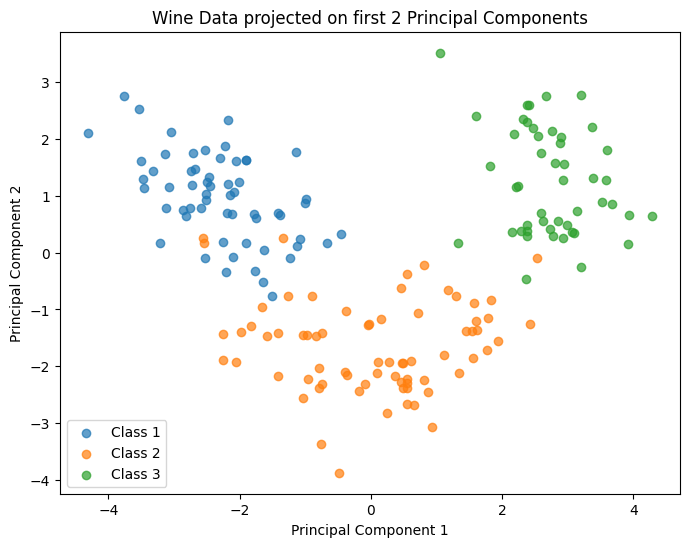

In [7]:
# Step 4: Visualization
plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=f"Class {label}", alpha=0.7)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Wine Data projected on first 2 Principal Components")
plt.legend()
plt.show()